In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[:100, :], y[:100], test_size=0.3)

# Perceptron idea

Perceptron was invented in 1957 by Frank Rosenblatt

![](img/f4.png)

Full-net input is calculated using

![](img/f1.bmp)

As activation function, we use Heaviside step-function

  ![](img/f3.gif)

Weights are update using rules

![](img/f2.bmp)

# Algorithm

Algorithm steps:
1. Initialize random, non-zero weights
2. For each iteration:
- predict value
- adjust weight

# Implementation

In [3]:
class Perceptron:
    """
    Rosenblatt's Perceptron
    
    Attributes
    ----------------
    eta : float
        learning rate
    n_iters : int
        number of epochs to train model
    w : one-dimensional array
        vector of weights [n_features, ]
    b : float
        bias of the model
        
    Methods
    -----------------
    fit(X, y)
        fits classifier to data
    predict(X)
        predict classes for samples in matrix X
    __net_input(X)
        calculate full net input
    """
    
    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        error_ = []
        for i in range(self.n_iters):
            error_count = 0
            for xi, y_true in zip(X, y):
                # predict class
                pred = self.predict(xi)
                error = (pred - y_true)
                # adjust weights
                self.w -= self.eta * error * xi
                self.b -= self.eta * error
                if error == 1:
                    error_count += 1
            error_.append(error_count)
        return error_
    
    def predict(self, X):
        return np.where(self.__net_input(X) >= 0, 1, 0)

    def __net_input(self, X):
        return np.dot(X, self.w) + self.b

# Training model

In [4]:
perceptron = Perceptron()
error = perceptron.fit(X_train, y_train)

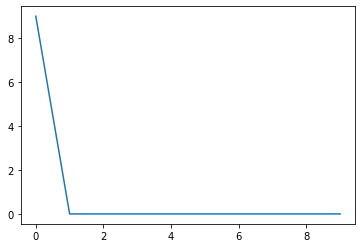

In [5]:
plt.plot(np.arange(0, len(error)), error)
plt.show()

# Validate classifier

In [6]:
pred = perceptron.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, pred)}')

Accuracy on test set: 1.0
